<a href="https://colab.research.google.com/github/k-washi/GoogleColab_ML/blob/master/DeepNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
%cd "drive/My Drive/datasets/pytorch_test"

[Errno 2] No such file or directory: 'drive/My Drive/datasets/pytorch_test'
/content/drive/My Drive/datasets/pytorch_test


In [5]:
import torch
from torch.nn import Linear
#y = wx + b
linear_layer = Linear(in_features=5,out_features=3,bias=True)

from torch.autograd import Variable
inp = Variable(torch.randn(1, 5))
linear_layer(inp)
print(linear_layer.weight) #５つの入力に対する重み
print(linear_layer.bias) #バイアス

Parameter containing:
tensor([[-0.0348,  0.1494,  0.0180, -0.4310, -0.2504],
        [ 0.0505,  0.3368, -0.4180,  0.4085,  0.2221],
        [-0.1739,  0.3684,  0.1828, -0.1006,  0.0529]], requires_grad=True)
Parameter containing:
tensor([ 0.2550, -0.2516, -0.0825], requires_grad=True)


In [6]:
linear_layer = Linear(5, 3)
linear_layer_2 = Linear(3, 2)
linear_layer_2(linear_layer(inp))

tensor([[-0.4709, -0.2415]], grad_fn=<AddmmBackward>)

計算コストの面では、Sigmoidやtanhが不利
ReLUは、慎重に学習率を選択しなければ、dead neutronsという非活性状態になる。

In [8]:
import torch.nn as nn
ex_data = Variable(torch.Tensor([[10, 2, -1, -1]]))
ex_relu = nn.ReLU()
ex_relu(ex_data)

tensor([[10.,  2.,  0.,  0.]])

In [0]:
class MyFirstNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyFirstNetwork,self).__init__() 
        self.layer1 = nn.Linear(input_size,hidden_size) 
        self.layer2 = nn.Linear(hidden_size,output_size)
    def __forward__(self,input): 
        out = self.layer1(input) 
        out = nn.ReLU(out)
        out = self.layer2(out) 
        return out

In [0]:
my_network = MyFirstNetwork(input_size = 3, hidden_size = 2, output_size = 1)

In [14]:
#Loss
loss = nn.MSELoss()
input = Variable(torch.randn(3, 5), requires_grad=True) 
target = Variable(torch.randn(3, 5))
output = loss(input, target)
output.backward()
print(output)

tensor(1.9055, grad_fn=<MseLossBackward>)


In [0]:
def cross_entropy_function(true_label, prediction):
    if true_label == 1:
        return -log(prediction)
    else:
        return -log(1 - prediction)

In [24]:
loss = nn.CrossEntropyLoss()
input = Variable(torch.randn(2, 6), requires_grad=True)
target = Variable(torch.LongTensor(2).random_(6))
print(torch.LongTensor(2).random_(6))
print(target)
output = loss(input, target)
output.backward()
print(output)


tensor([4, 5])
tensor([1, 1])
tensor(2.7760, grad_fn=<NllLossBackward>)


In [27]:
optimizer = torch.optim.SGD(my_network.parameters(), lr = 0.01)
"""
print(torch.utils.data.Dataset)
for input, target in torch.utils.data.Dataset:
    optimizer.zero_grad()
    output = model(input)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
"""

'\nprint(torch.utils.data.Dataset)\nfor input, target in torch.utils.data.Dataset:\n    optimizer.zero_grad()\n    output = model(input)\n    loss = loss_fn(output, target)\n    loss.backward()\n    optimizer.step()\n'

In [0]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models
from torch.optim import lr_scheduler
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import warnings
warnings.filterwarnings("ignore")
import time
%matplotlib inline

In [32]:
!ls
path = 'Dog-Cat-Classifier/Data/Train_Data/'
dog_files = [f for f in glob.glob('Dog-Cat-Classifier/Data/Train_Data/dog/*.jpg')]
cat_files = [f for f in glob.glob('Dog-Cat-Classifier/Data/Train_Data/cat/*.jpg')]
files = dog_files + cat_files
print(f'Total no of images {len(files)}')
no_of_images = len(files)

shuffle = np.random.permutation(no_of_images)

admit_status.csv  Dog-Cat-Classifier
Total no of images 1399


In [0]:
os.mkdir(os.path.join(path, 'train'))
os.mkdir(os.path.join(path, 'valid'))

In [0]:
for t in ['train', 'valid']:
  for folder in ['dog/', 'cat/']:
    os.mkdir(os.path.join(path, t, folder))

In [38]:
print(shuffle[0])
for i in shuffle[250:]:
    folder = files[i].split('/')[-2].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'train',folder,image))
print(folder)
print(image)

1086
cat
cat.1140.jpg


In [39]:
print(shuffle[0])
for i in shuffle[:250]:
    folder = files[i].split('/')[-2].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'valid',folder,image))
print(folder)
print(image)

1086
dog
dog.290.jpg


ImageFolder は、pytorchが提供する、データ読み込み用のAPI
+ Scale to any image size
+ convert to a pytorch tensor
+ normalize the data

In [41]:
if torch.cuda.is_available():
    is_cuda = True
    print("torch is cuda available")

torch is cuda available


In [46]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train = ImageFolder('Dog-Cat-Classifier/Data/Train_Data/train/',simple_transform)
valid = ImageFolder('Dog-Cat-Classifier/Data/Train_Data/valid/',simple_transform)
print(train)
print(valid)
print(train.class_to_idx)
print(train.classes) 

Dataset ImageFolder
    Number of datapoints: 1149
    Root location: Dog-Cat-Classifier/Data/Train_Data/train/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Dataset ImageFolder
    Number of datapoints: 250
    Root location: Dog-Cat-Classifier/Data/Train_Data/valid/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
{'cat': 0, 'dog': 1}
['cat', 'dog']


In [0]:
def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)   

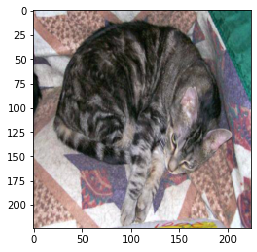

In [49]:
imshow(train[30][0])

Create train data
+ shuffle: When true, this shuffles the images every time the data loader is called.
+ num_workers: This is responsible for parallelization. It is common practice to use a number of workers fewer than the number of cores available in your machine.


In [0]:
train_data_gen = torch.utils.data.DataLoader(train,shuffle=True,batch_size=64,num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(valid,batch_size=64,num_workers=3)
dataloaders = {'train':train_data_gen,'valid':valid_data_gen}
dataset_sizes = {'train':float(len(train_data_gen.dataset)),'valid':float(len(valid_data_gen.dataset))}

In [51]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

if torch.cuda.is_available():
    model_ft = model_ft.cuda()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
model_ft

StepLRは、学習率を動的に変更する。

In [0]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                # wrap them in Variable
                if torch.cuda.is_available():
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                # zero the parameter gradients
                #https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch
                optimizer.zero_grad()
                
                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data#[0]
                
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [81]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=2)

Epoch 0/1
----------
tensor(64, device='cuda:0') 1149.0
tensor(128, device='cuda:0') 1149.0
tensor(192, device='cuda:0') 1149.0
tensor(256, device='cuda:0') 1149.0
tensor(320, device='cuda:0') 1149.0
tensor(384, device='cuda:0') 1149.0
tensor(448, device='cuda:0') 1149.0
tensor(512, device='cuda:0') 1149.0
tensor(576, device='cuda:0') 1149.0
tensor(640, device='cuda:0') 1149.0
tensor(704, device='cuda:0') 1149.0
tensor(767, device='cuda:0') 1149.0
tensor(831, device='cuda:0') 1149.0
tensor(895, device='cuda:0') 1149.0
tensor(959, device='cuda:0') 1149.0
tensor(1023, device='cuda:0') 1149.0
tensor(1087, device='cuda:0') 1149.0
tensor(1148, device='cuda:0') 1149.0
train Loss: 0.0004 Acc: 0.9991
tensor(64, device='cuda:0') 250.0
tensor(128, device='cuda:0') 250.0
tensor(192, device='cuda:0') 250.0
tensor(249, device='cuda:0') 250.0
valid Loss: 0.0004 Acc: 0.9960

Epoch 1/1
----------
tensor(64, device='cuda:0') 1149.0
tensor(128, device='cuda:0') 1149.0
tensor(192, device='cuda:0') 1149.0